In [95]:
import pandas as pd
from shapely.geometry import LineString
import geopandas
import matplotlib.pyplot as plt
import networkx as nx
from pygraphviz import *
from operator import itemgetter
import community as community_louvain

In [96]:
node_df = pd.read_csv(r"C:\Users\Adam\Desktop\UCSB\Dissertation\Spatial Network Files\egypt\working_data\nodes_list.csv")

In [97]:
node_gdf = geopandas.GeoDataFrame(node_df, geometry = geopandas.points_from_xy(node_df.Lat, node_df.Long, crs ='EPSG:4326'))

In [98]:
print(node_gdf.head())

                                             authors           creators  \
0  Rupp, D., B. Kiesling, S. Gillies, J. Åhlfeldt...            D. Rupp   
1  Borza, E., B. Kiesling, S. Gillies, J. Åhlfeld...         E.N. Borza   
2  Foss, C., G. Reger, DARMC, S. Gillies, B. Kies...  C. Foss, G. Reger   
3  Rupp, D., R. Talbert, S. Gillies, T. Elliott, ...            D. Rupp   
4  Foss, C., G. Reger, R. Talbert, S. Gillies, R....  C. Foss, G. Reger   

       id        Lat            reprLatLong       Long            title  \
0  707596  34.705326   34.7053255,32.579086  32.579086    (Palai)Paphos   
1  501325  40.195115   40.1951155,26.409131  26.409131           Abydos   
2  599476  36.906370     36.90637,25.998408  25.998408          Aigiale   
3  707483  35.034889   35.034889, 32.421841  32.421841   Arsinoe/Marion   
4  599477  37.412541  37.4125411,26.7185965  26.718597  Akrite (island)   

  Garrison Temple                   geometry  
0      NaN    NaN  POINT (34.70533 32.57909)  
1   

In [99]:
node_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [100]:
edges_df = pd.read_csv(r"C:\Users\Adam\Desktop\UCSB\Dissertation\Spatial Network Files\egypt\working_data\edge_list.csv")

In [101]:
edges_df = edges_df.drop_duplicates(subset=['source', 'target'])
edges_df

,source title,source,target title,target,Arnaud Route 1,Arnaud Route 2
0,Phalasarna,589989,Tainaron (settlement),570702,60,NaN
1,Phykous,373872,Kriou Metopon,589884,56,57
2,Phykous,373872,Tainaron (settlement),570702,55a,NaN
3,Chersonesos Akra/Cyrene,373778,Kaudos?,589859,58,NaN
4,Petras Megas,716619,Chersonasos,589744,59,NaN
...,...,...,...,...,...,...
183,Delos,599587,Isthmia,570316,119,NaN
184,Rhodos,590030,Samos,599925,126,NaN
185,Rhodos,590030,Tenedos,550911,127,NaN
186,Kaudos,589859,Kriou Metopon,589884,NaN,NaN


In [102]:
Egypt_network = nx.from_pandas_edgelist(edges_df, 'source','target', create_using=nx.Graph())

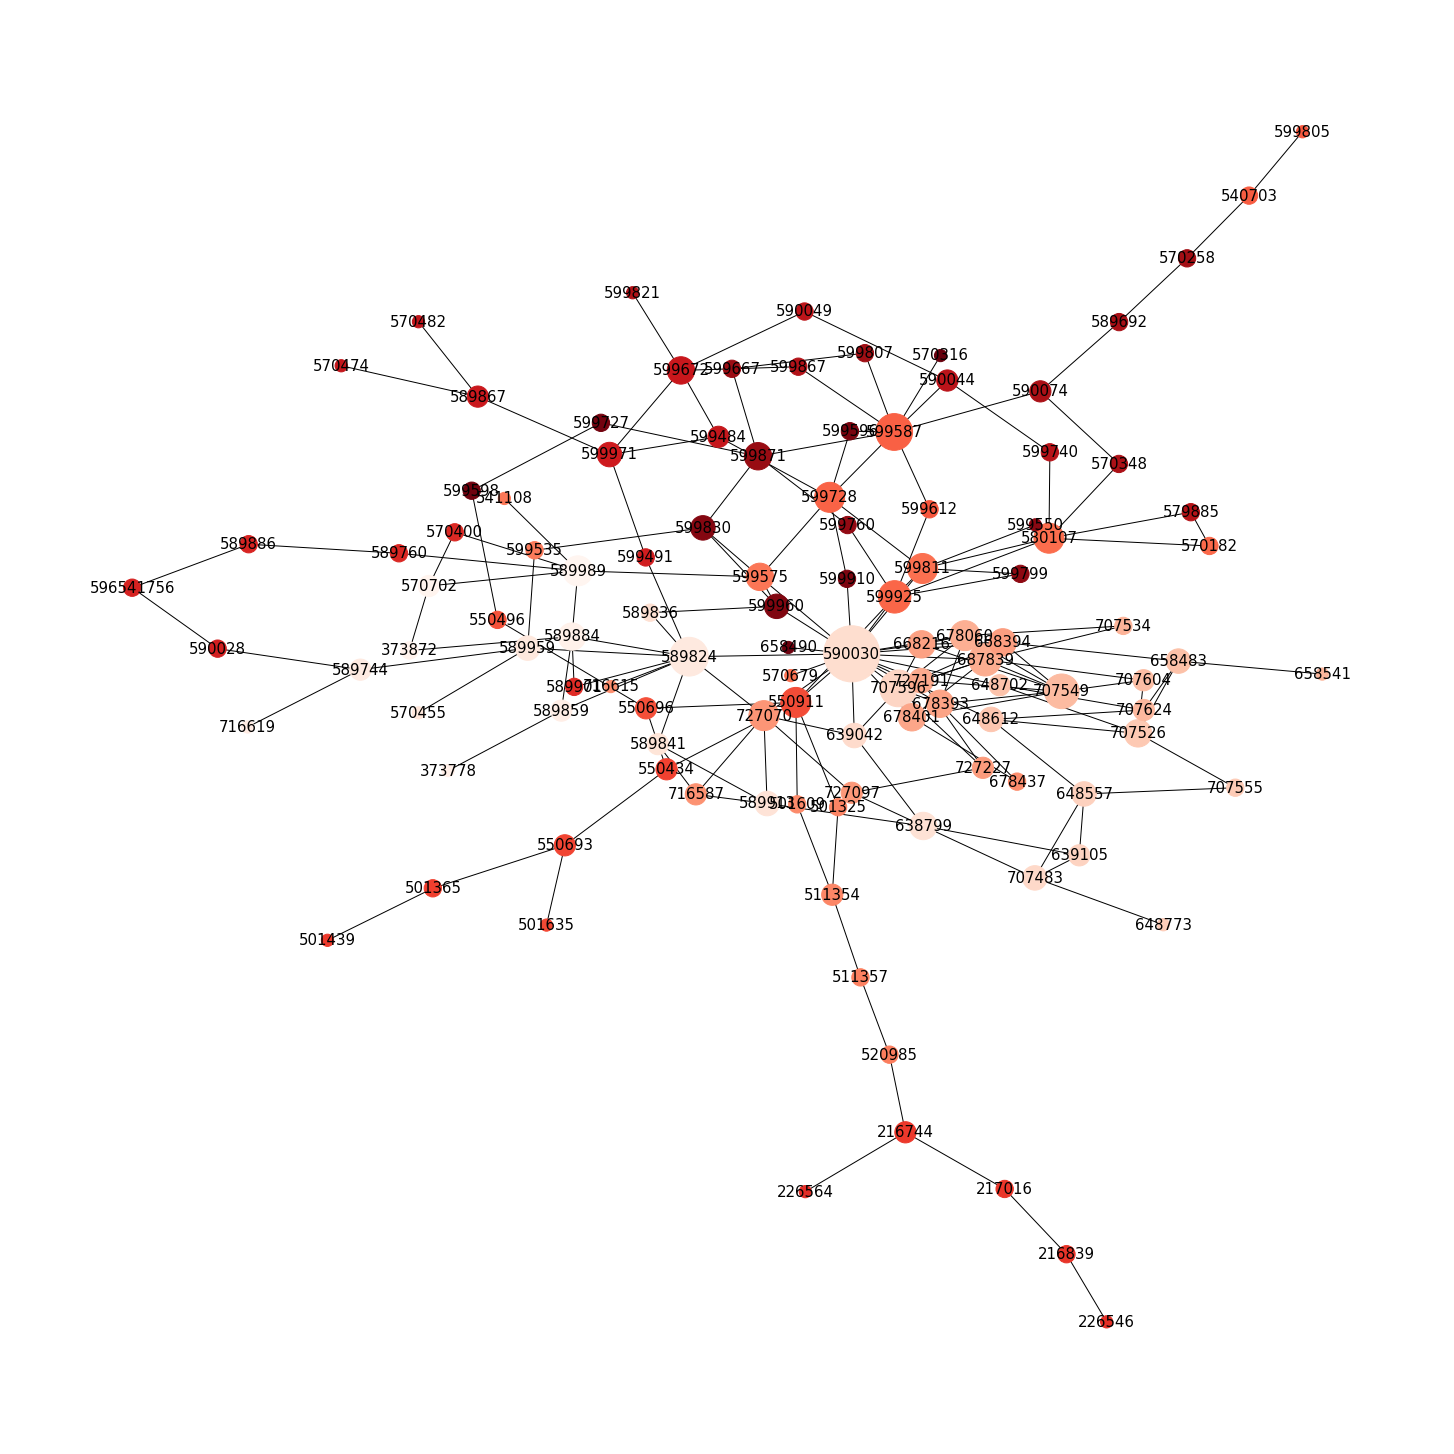

In [103]:
plt.figure(figsize=(20,20))

d = dict(Egypt_network.degree)
pos = nx.nx_agraph.graphviz_layout(Egypt_network, prog='neato')
nx.draw(Egypt_network, pos, node_color = range(113), node_size=[v * 150 for v in d.values()], cmap=plt.cm.Reds)
nx.draw_networkx_labels(Egypt_network,pos, font_size=15)
plt.show()

In [104]:
#calculates degree

degree_dict = dict(Egypt_network.degree(Egypt_network.nodes()))
nx.set_node_attributes(Egypt_network, degree_dict, 'degree')

In [105]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
sorted_degree_df = pd.DataFrame(sorted_degree, columns =['pid', 'Degree'])
sorted_degree_df

,pid,Degree
0,590030,21
1,589824,10
2,707596,9
3,599587,9
4,707549,8
...,...,...
108,570482,1
109,599821,1
110,599550,1
111,658490,1


In [106]:
#calculate betweennness

betweenness_dict = nx.betweenness_centrality(Egypt_network) # Run betweenness centrality
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse = True)
sorted_betweenness_df = pd.DataFrame(sorted_betweenness, columns = ['pid', 'betweenness'])
sorted_betweenness_df

,pid,betweenness
0,590030,0.580075
1,550911,0.272914
2,589824,0.244861
3,599587,0.144919
4,599925,0.143450
...,...,...
108,599799,0.000000
109,599550,0.000000
110,599596,0.000000
111,658490,0.000000


In [107]:
#calculate eigenvector centrality 

eigenvector_dict = nx.eigenvector_centrality(Egypt_network, max_iter = 1000) # Run eigenvector centrality
sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse = True)
sorted_eigenvector_df = pd.DataFrame(sorted_eigenvector, columns =['pid', 'Eigenvector Centrality'])

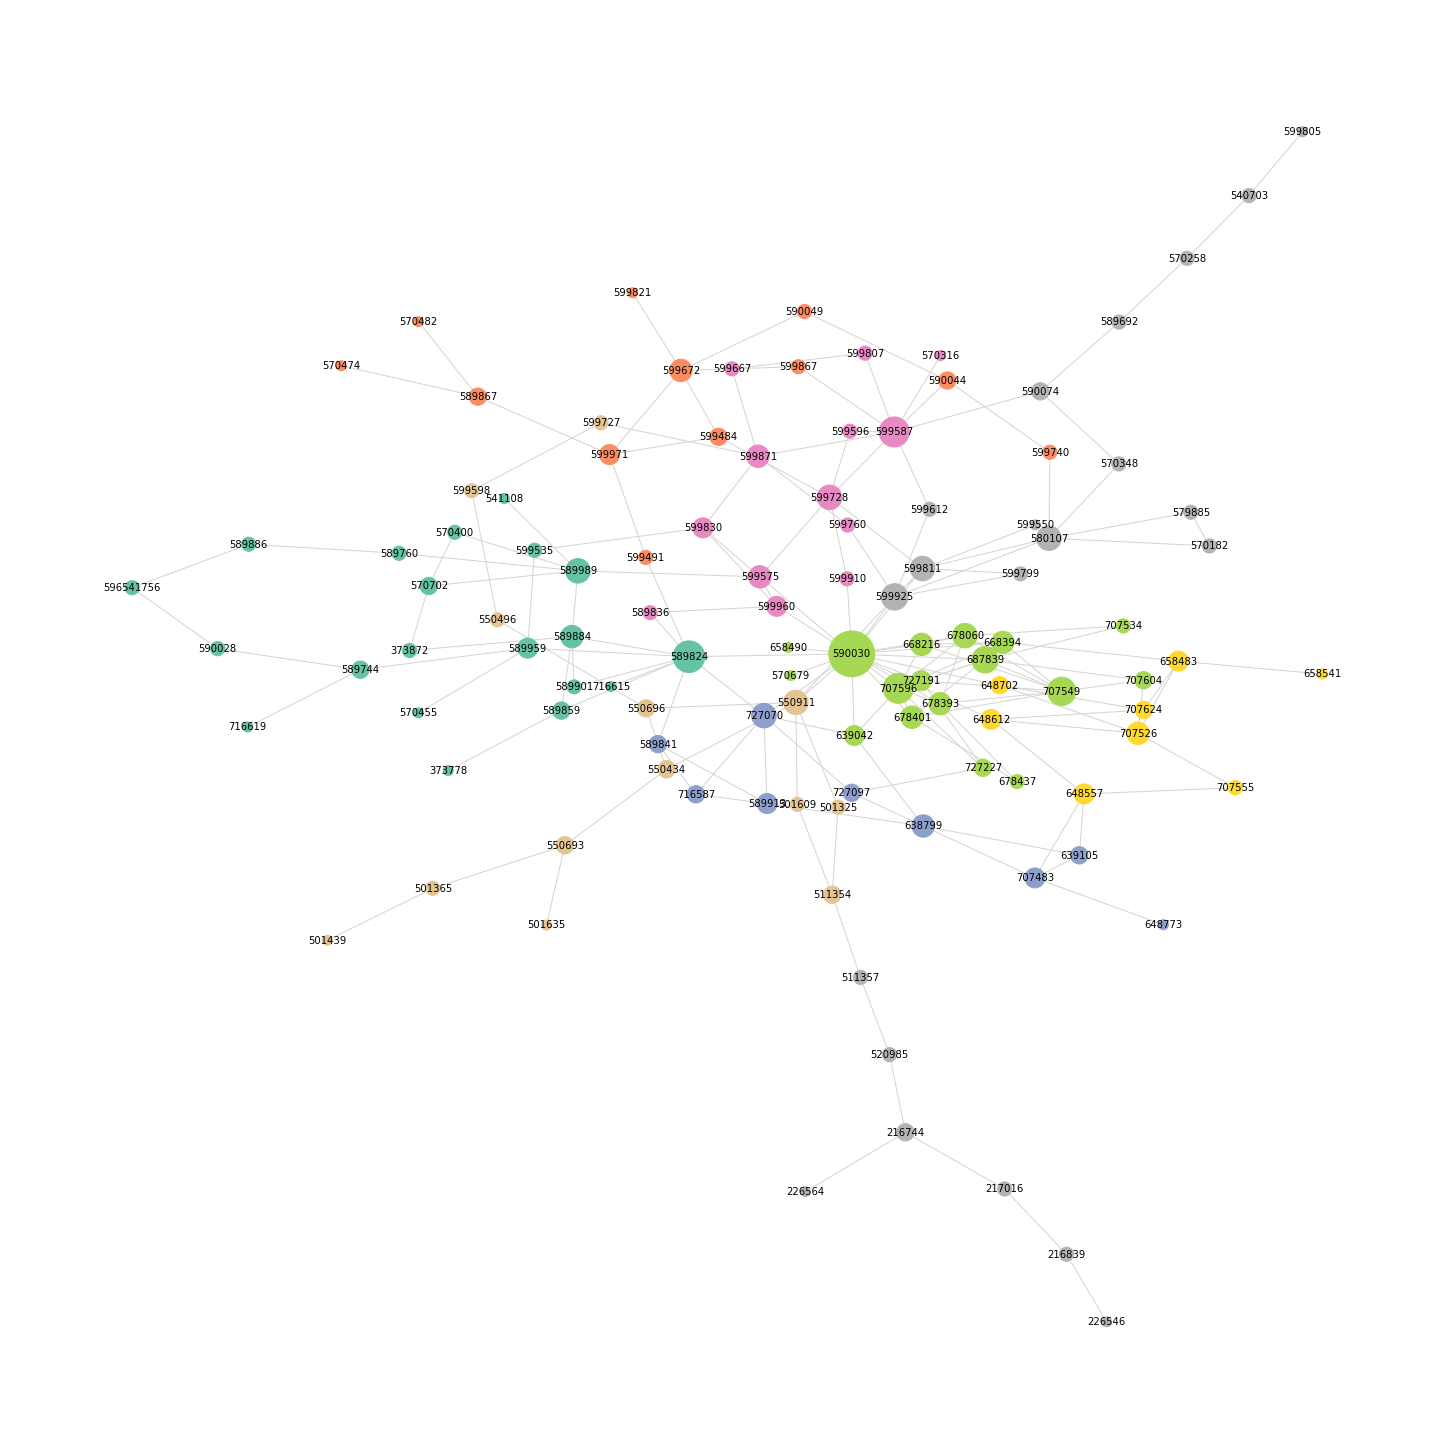

In [108]:
plt.figure(figsize=(20,20))

Egypt_com = nx.from_pandas_edgelist(edges_df, 'source', 'target')
Egypt_com_titles = nx.from_pandas_edgelist(edges_df, 'source title', 'target title')
partition = community_louvain.best_partition(Egypt_com)


colors = [partition[n] for n in Egypt_com.nodes()]
my_colors = plt.cm.Set2 # you can select other color pallettes here: https://matplotlib.org/users/colormaps.html

d = dict(Egypt_com.degree)
pos = nx.nx_agraph.graphviz_layout(Egypt_com, prog='neato')
nx.draw(Egypt_com, pos, node_color=colors, cmap = my_colors, edge_color = "#D4D5CE", node_size=[v * 100 for v in d.values()])
nx.draw_networkx_labels(Egypt_com,pos,font_size=10)
plt.show()

In [109]:
source_titles = edges_df[['source title', 'source']]
source_titles = source_titles.drop_duplicates()
source_titles = source_titles.rename(columns = {"source": "pid"})
source_titles

,source title,pid
0,Phalasarna,589989
1,Phykous,373872
3,Chersonesos Akra/Cyrene,373778
4,Petras Megas,716619
5,Kriou Metopon,589884
...,...,...
161,Antigoneia/(Col. Augusta) Alexandria Troas,550434
162,Tenedos,550911
173,Paphos,707596
183,Delos,599587


In [110]:
#merge dfs to process in SQL
calculations_df = pd.DataFrame(Egypt_com.nodes, columns =['pid'])
calculations_df = calculations_df.merge(sorted_degree_df, on = 'pid')
calculations_df = calculations_df.merge(sorted_betweenness_df, on = 'pid')
calculations_df = calculations_df.merge(sorted_eigenvector_df, on ='pid')
calculations_df


,pid,Degree,betweenness,Eigenvector Centrality
0,589989,6,0.099748,0.025230
1,570702,3,0.002051,0.005516
2,373872,2,0.001469,0.005948
3,589884,5,0.032111,0.033204
4,373778,1,0.000000,0.004022
...,...,...,...,...
108,599596,2,0.000000,0.011429
109,599727,2,0.010950,0.002084
110,599598,2,0.005212,0.000829
111,658490,1,0.000000,0.078337


In [111]:
# create df for partitions and merge with other calculations_df
partdf = pd.DataFrame(list(partition.items()),columns = ['pid','partition']) 
partdf


,pid,partition
0,589989,0
1,570702,0
2,373872,0
3,589884,0
4,373778,0
...,...,...
108,599596,3
109,599727,6
110,599598,6
111,658490,4


In [112]:
final_calculationsdf = calculations_df.merge(partdf, on = 'pid')
final_calculationsdf.to_csv('network_calculations.csv')

In [113]:
final_calculationsdf

,pid,Degree,betweenness,Eigenvector Centrality,partition
0,589989,6,0.099748,0.025230,0
1,570702,3,0.002051,0.005516,0
2,373872,2,0.001469,0.005948,0
3,589884,5,0.032111,0.033204,0
4,373778,1,0.000000,0.004022,0
...,...,...,...,...,...
108,599596,2,0.000000,0.011429,3
109,599727,2,0.010950,0.002084,6
110,599598,2,0.005212,0.000829,6
111,658490,1,0.000000,0.078337,4


In [114]:
mapDf = pd.merge(final_calculationsdf, node_gdf, how='left', left_on=['pid'], right_on=['id'])
mapDf

,pid,Degree,betweenness,Eigenvector Centrality,partition,authors,creators,id,Lat,reprLatLong,Long,title,Garrison,Temple,geometry
0,589989,6,0.099748,0.025230,0,"Bennet, J., G. Reger, DARMC, B. Kiesling, R. T...","J. Bennet, G. Reger",589989,35.505997,"35.505997,23.5754855",23.575485,Phalasarna,NaN,NaN,POINT (35.50600 23.57549)
1,570702,3,0.002051,0.005516,0,"Reger, G., J. McK. Camp II, DARMC, R. Talbert,...","G. Reger, J. McK. Camp II",570702,36.401359,"36.4013585697,22.486503682",22.486504,Tainaron (settlement),NaN,NaN,POINT (36.40136 22.48650)
2,373872,2,0.001469,0.005948,0,"Mattingly, D., T. Elliott, S. Gillies, B. Kies...",D.J. Mattingly,373872,32.919182,"32.919182,21.631788",21.631788,Phykous,NaN,NaN,POINT (32.91918 21.63179)
3,589884,5,0.032111,0.033204,0,"Bennet, J., G. Reger, J. Becker, T. Elliott, S...","J. Bennet, G. Reger",589884,35.231900,"35.2319,23.5896",23.589600,Kriou Metopon,NaN,NaN,POINT (35.23190 23.58960)
4,373778,1,0.000000,0.004022,0,"Mattingly, D., T. Elliott, S. Gillies, B. Kies...","Mattingly, D., T. Elliott, S. Gillies, B. Kies...",373778,32.820349,"32.820348545, 21.8565546881",21.856555,Chersonesos Akra/Cyrene,NaN,NaN,POINT (32.82035 21.85655)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,599596,2,0.000000,0.011429,3,"Foss, C., G. Reger, J. Becker, T. Elliott, S. ...","C. Foss, G. Reger",599596,37.097197,"37.0971972,25.8050678",25.805068,Donousa (island),NaN,NaN,POINT (37.09720 25.80507)
113,599727,2,0.010950,0.002084,6,"Foss, C., G. Reger, DARMC, R. Talbert, S. Gill...","C. Foss, G. Reger",599727,37.578866,"37.578866,26.479008",26.479008,Korsiai?,NaN,NaN,POINT (37.57887 26.47901)
114,599598,2,0.005212,0.000829,6,"Foss, C., G. Reger, DARMC, R. Talbert, S. Gill...","C. Foss, G. Reger",599598,37.693867,"37.693867,26.356402",26.356402,Drakanon,NaN,NaN,POINT (37.69387 26.35640)
115,658490,1,0.000000,0.078337,4,"T. Sinclair, P.-L. Gatier","T. Sinclair, P.-L. Gatier",658490,36.840292,"36.8402925, 36.1950485",26.049790,Issus,NaN,NaN,POINT (36.84029 26.04979)


In [115]:
mapDf.to_csv('map_out.csv')

In [116]:
print(mapDf[['pid','Garrison','Temple']])

        pid Garrison Temple
0    589989      NaN    NaN
1    570702      NaN    NaN
2    373872      NaN    NaN
3    589884      NaN    NaN
4    373778      NaN    NaN
..      ...      ...    ...
112  599596      NaN    NaN
113  599727      NaN    NaN
114  599598      NaN    NaN
115  658490      NaN    NaN
116  570316      NaN    NaN

[117 rows x 3 columns]


In [117]:
check = mapDf.loc[22]
check

pid                                                                  707555
Degree                                                                    2
betweenness                                                        0.001302
Eigenvector Centrality                                             0.010743
partition                                                                 5
authors                   Rupp, D., R. Talbert, S. Gillies, T. Elliott, ...
creators                                                            D. Rupp
id                                                                   707555
Lat                                                               35.354118
reprLatLong                                         35.35411835, 33.2001564
Long                                                              33.200156
title                                                              Lapethos
Garrison                                                                NaN
Temple      